In [1]:
# Importing the libraries
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error

In [2]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [3]:
dataset = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv', index_col = 'Date', parse_dates = ['Date'])
dataset.head()                                                                                                                  

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


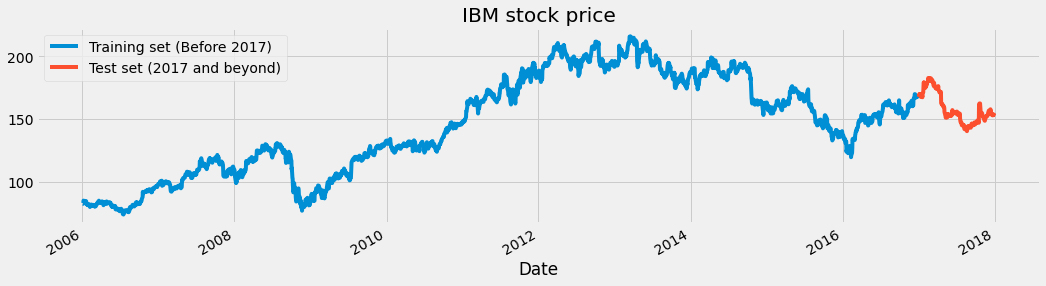

In [4]:
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [5]:
training_set = dataset[:'2016'].iloc[:, 1:2].values
testing_set = dataset['2017':].iloc[:, 1:2].values

sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
X_train = []
y_train = []

for i in range(60, 2769):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 11s 55ms/step - loss: 0.0461
Epoch 2/50
85/85 [==============================] - 5s 55ms/step - loss: 0.0104
Epoch 3/50
85/85 [==============================] - 5s 54ms/step - loss: 0.0094
Epoch 4/50
85/85 [==============================] - 5s 54ms/step - loss: 0.0075
Epoch 5/50
85/85 [==============================] - 5s 56ms/step - loss: 0.0058
Epoch 6/50
85/85 [==============================] - 5s 56ms/step - loss: 0.0058
Epoch 7/50
85/85 [==============================] - 5s 55ms/step - loss: 0.0047
Epoch 8/50
85/85 [==============================] - 5s 55ms/step - loss: 0.0042
Epoch 9/50
85/85 [==============================] - 5s 57ms/step - loss: 0.0040
Epoch 10/50
85/85 [==============================] - 5s 58ms/step - loss: 0.0041
Epoch 11/50
85/85 [==============================] - 5s 59ms/step - loss: 0.0042
Epoch 12/50
85/85 [==============================] - 5s 59ms/step - loss: 0.0037
Epoch 13/50
85/85 [=================

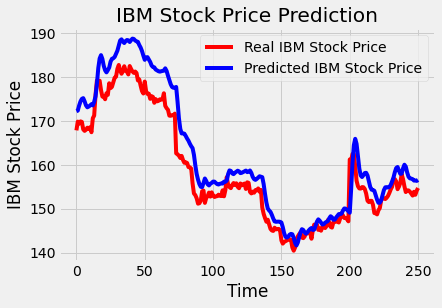

In [ ]:
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(testing_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plot_predictions(testing_set,predicted_stock_price)